# Assignment-06-Logistic Regression

# '''The steps involved in logistic regression are:
Define the problem: Identify the dependent variable and independent variables and determine if the problem is a binary classification problem.

Data preparation: Clean and preprocess the data, and make sure the data is suitable for logistic regression.

Fitting Logistic Regression to the Training set.

Predicting the test result.

Test accuracy of the result (Creation of Confusion matrix).

Visualizing the test set result (optional).

Logistic regression has two phases: training and test.'''

In [2]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
%matplotlib inline

In [3]:
# Importing the dataset
bank_data=pd.read_csv(r'C:\Users\t5498nk\Desktop\NAVANEETH KADALOORI\DATA SCIENCE\Logistics Regression\bank-full.csv',sep=";")
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


## EDA

In [4]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
bank_data.shape

(45211, 17)

In [6]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
bank_data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [8]:
bank_data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
bank_data[bank_data.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


# Visualization

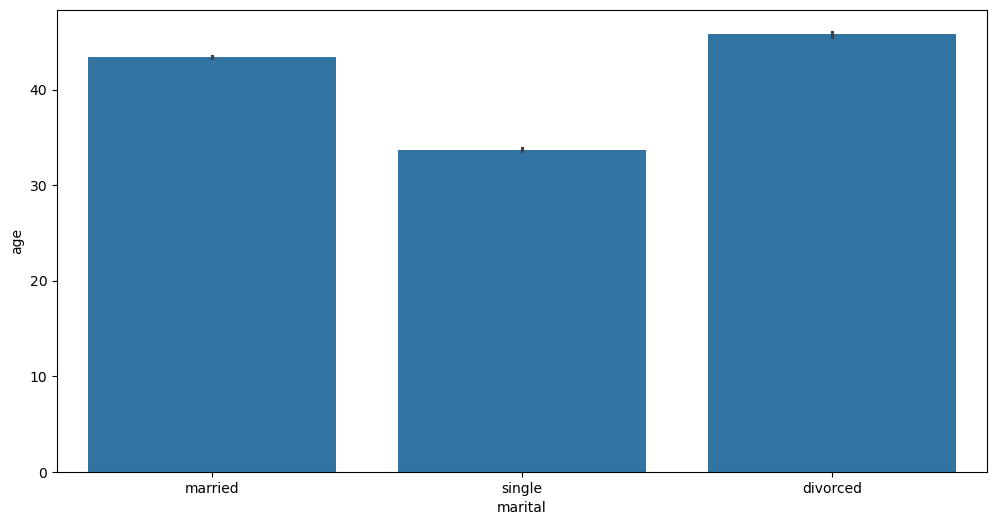

In [10]:
f, ax = plt.subplots(figsize=(12,6))
sns.barplot(x='marital',y='age' , data=bank_data);

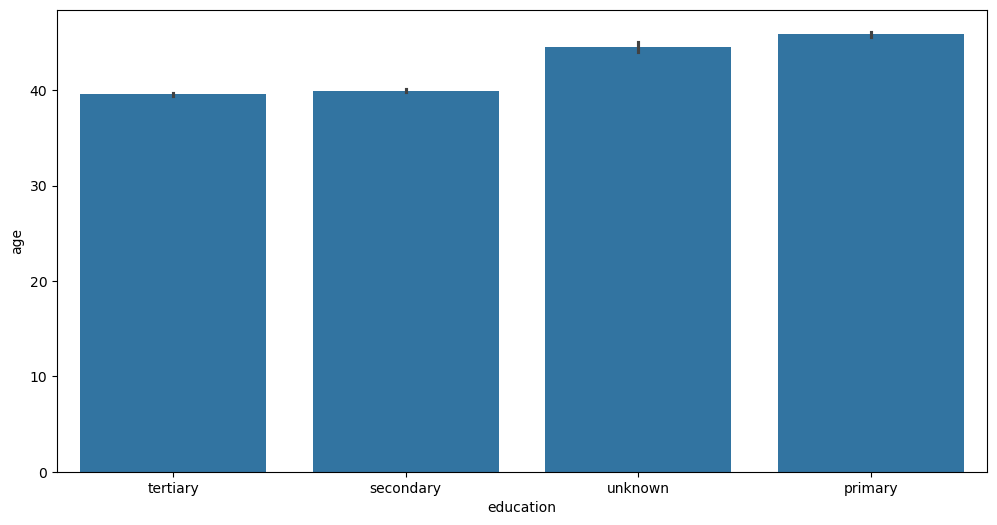

In [11]:
f, ax = plt.subplots(figsize=(12,6))
sns.barplot(x='education',y='age' , data=bank_data);

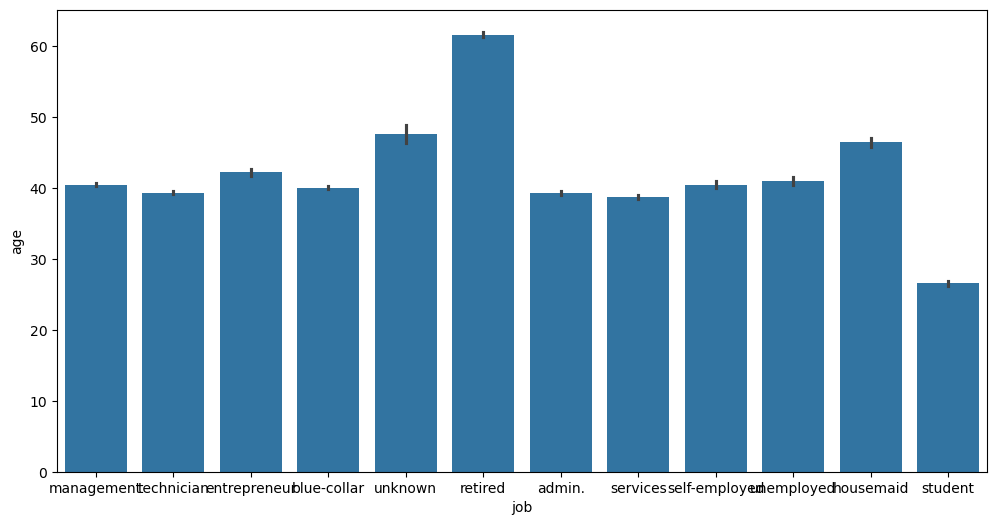

In [12]:
f, ax = plt.subplots(figsize=(12,6))

sns.barplot(x='job',y='age' , data=bank_data);

<Axes: ylabel='count'>

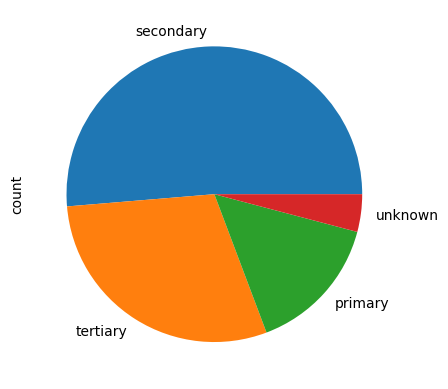

In [13]:
import matplotlib.pyplot as plt 
bank_data["education"].value_counts()
bank_data.education.value_counts().plot(kind="pie")

<Axes: ylabel='count'>

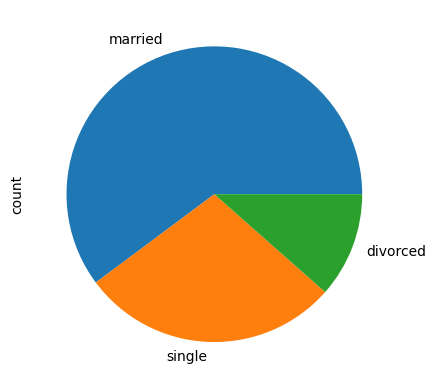

In [14]:
bank_data["marital"].value_counts()
bank_data.marital.value_counts().plot(kind="pie")

<Axes: ylabel='count'>

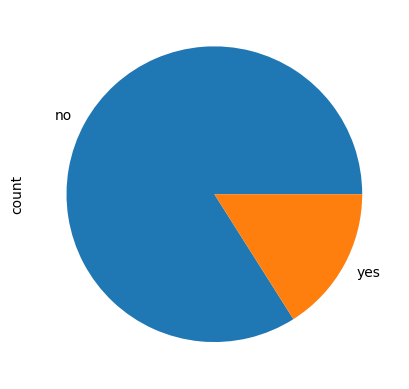

In [15]:
bank_data["loan"].value_counts()
bank_data.loan.value_counts().plot(kind="pie")

<Axes: ylabel='count'>

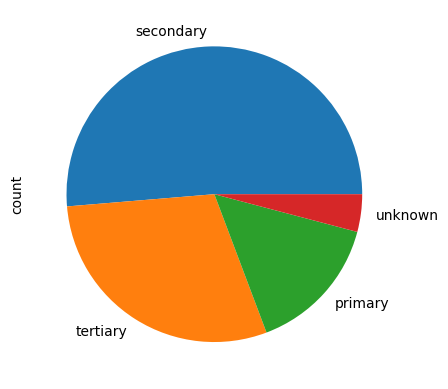

In [16]:
bank_data["education"].value_counts()
bank_data.education.value_counts().plot(kind="pie")

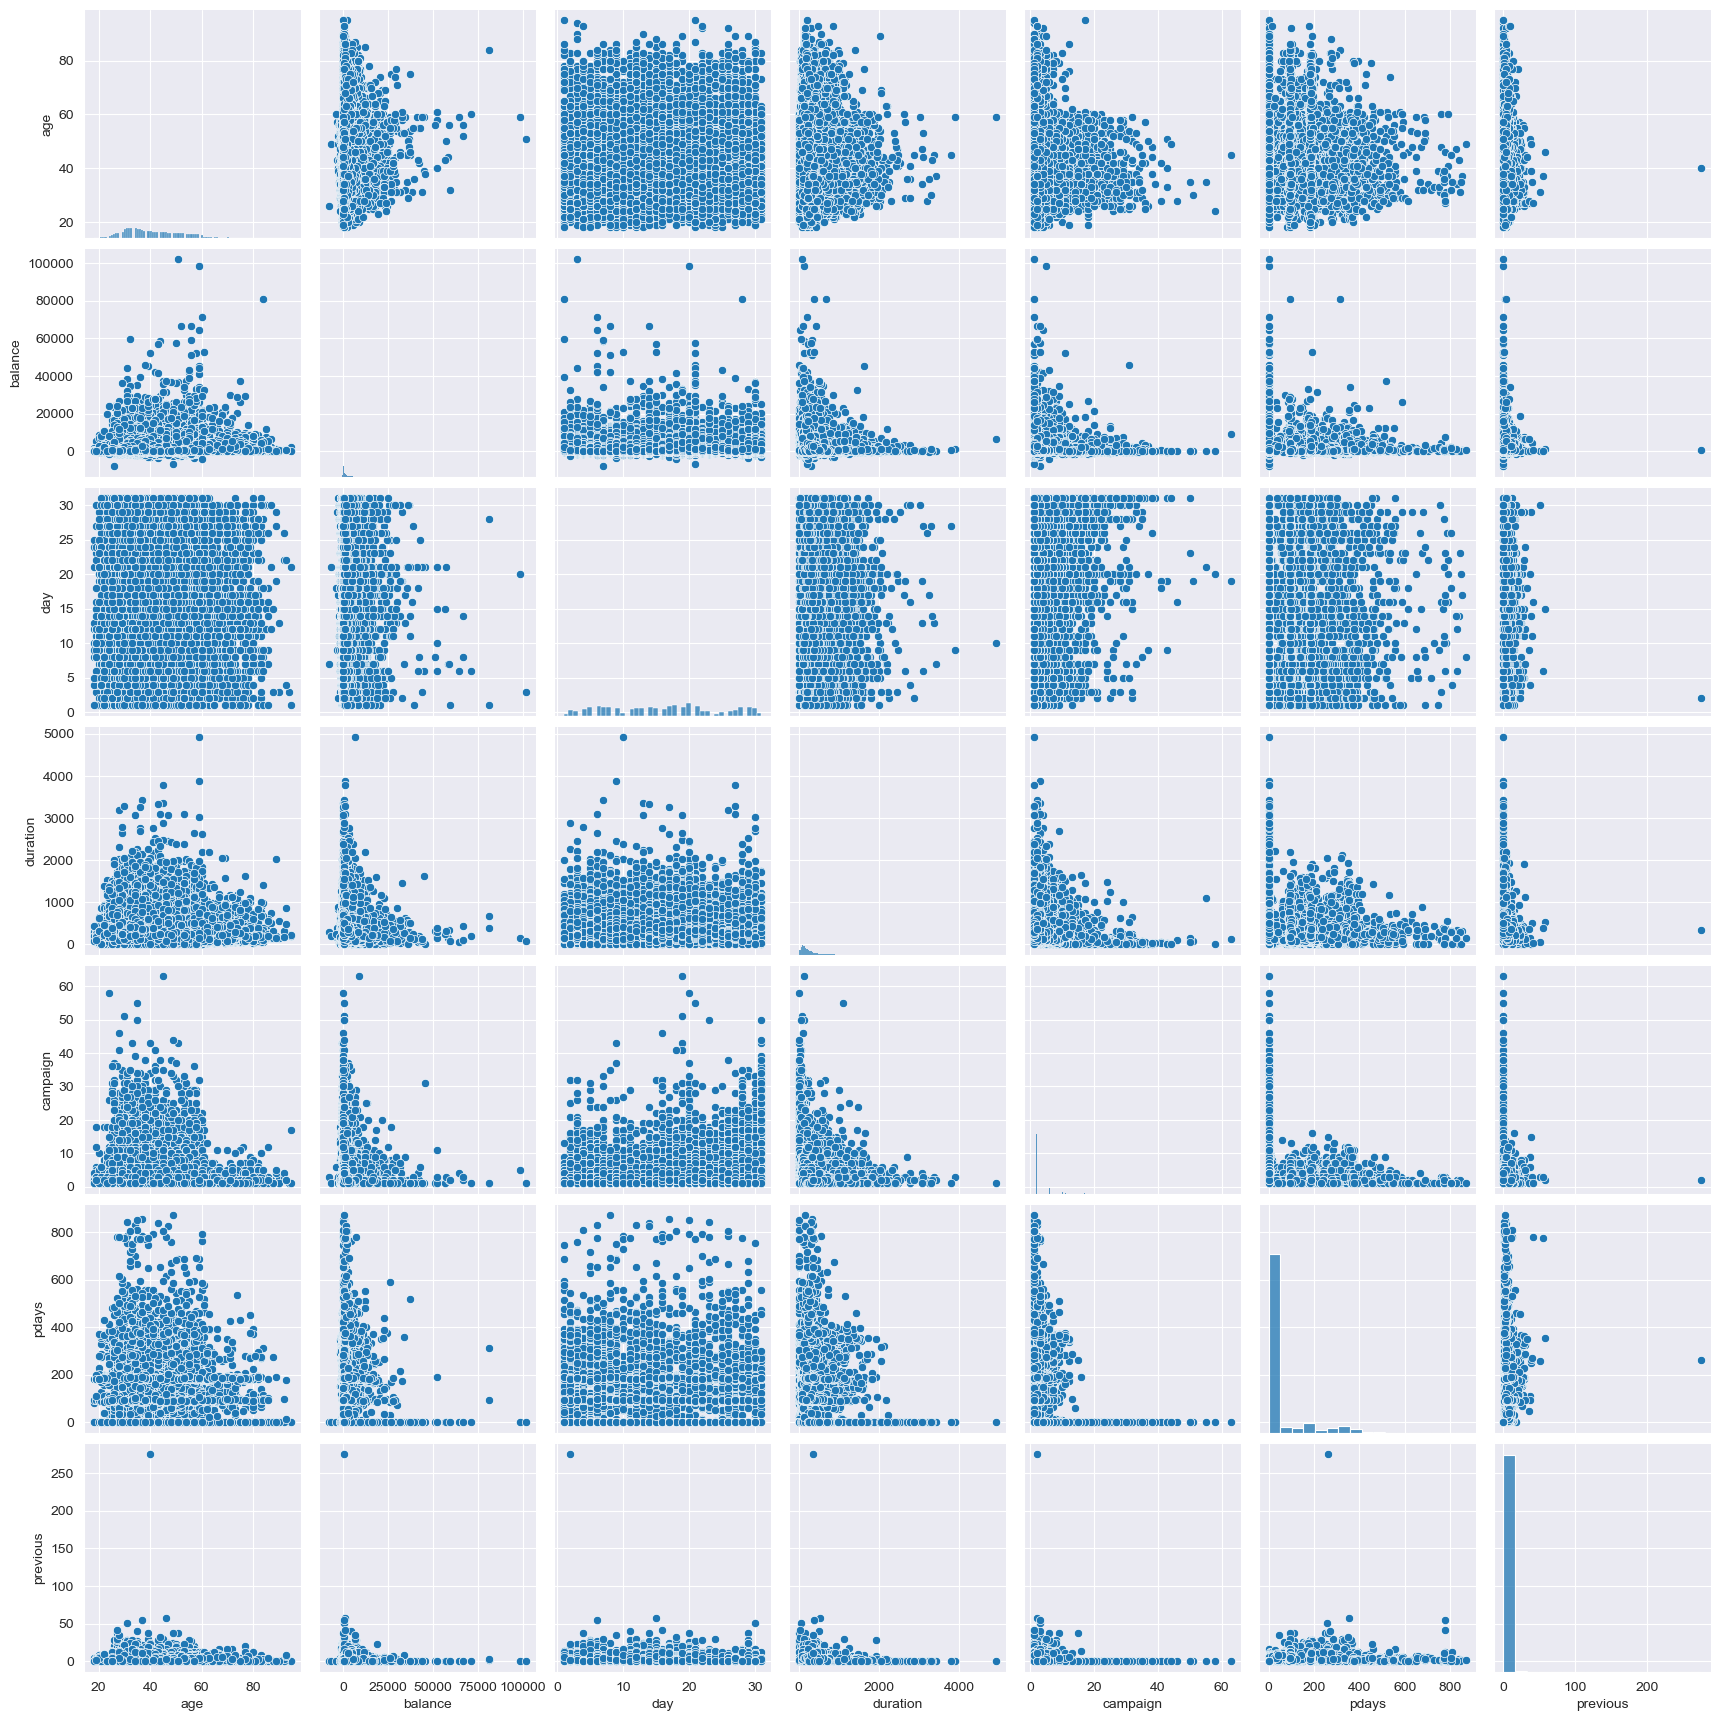

In [17]:
# Pairplot
sns.set_style(style='darkgrid')
sns.pairplot(bank_data)

# Data preparation

In [18]:
# One-Hot Encoding of categrical variables
bank_data1=pd.get_dummies(bank_data,columns=["job","marital","education","contact","month","poutcome"])
bank_data1

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,no,2143,yes,no,5,261,1,-1,0,...,False,False,True,False,False,False,False,False,False,True
1,44,no,29,yes,no,5,151,1,-1,0,...,False,False,True,False,False,False,False,False,False,True
2,33,no,2,yes,yes,5,76,1,-1,0,...,False,False,True,False,False,False,False,False,False,True
3,47,no,1506,yes,no,5,92,1,-1,0,...,False,False,True,False,False,False,False,False,False,True
4,33,no,1,no,no,5,198,1,-1,0,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,17,977,3,-1,0,...,False,False,False,True,False,False,False,False,False,True
45207,71,no,1729,no,no,17,456,2,-1,0,...,False,False,False,True,False,False,False,False,False,True
45208,72,no,5715,no,no,17,1127,5,184,3,...,False,False,False,True,False,False,False,False,True,False
45209,57,no,668,no,no,17,508,4,-1,0,...,False,False,False,True,False,False,False,False,False,True


In [19]:
# To see all columns
pd.set_option("display.max.columns", None)
bank_data1

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,no,2143,yes,no,5,261,1,-1,0,no,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
1,44,no,29,yes,no,5,151,1,-1,0,no,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
2,33,no,2,yes,yes,5,76,1,-1,0,no,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
3,47,no,1506,yes,no,5,92,1,-1,0,no,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
4,33,no,1,no,no,5,198,1,-1,0,no,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,17,977,3,-1,0,yes,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
45207,71,no,1729,no,no,17,456,2,-1,0,yes,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
45208,72,no,5715,no,no,17,1127,5,184,3,yes,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
45209,57,no,668,no,no,17,508,4,-1,0,no,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True


In [20]:
bank_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  45211 non-null  int64 
 1   default              45211 non-null  object
 2   balance              45211 non-null  int64 
 3   housing              45211 non-null  object
 4   loan                 45211 non-null  object
 5   day                  45211 non-null  int64 
 6   duration             45211 non-null  int64 
 7   campaign             45211 non-null  int64 
 8   pdays                45211 non-null  int64 
 9   previous             45211 non-null  int64 
 10  y                    45211 non-null  object
 11  job_admin.           45211 non-null  bool  
 12  job_blue-collar      45211 non-null  bool  
 13  job_entrepreneur     45211 non-null  bool  
 14  job_housemaid        45211 non-null  bool  
 15  job_management       45211 non-null  bool  
 16  job_

In [21]:
# Custom Binary Encoding of Binary o/p variables 
bank_data1['default'] = np.where(bank_data1['default'].str.contains("yes"), 1, 0)
bank_data1['housing'] = np.where(bank_data1['housing'].str.contains("yes"), 1, 0)
bank_data1['loan'] = np.where(bank_data1['loan'].str.contains("yes"), 1, 0)
bank_data1['y'] = np.where(bank_data1['y'].str.contains("yes"), 1, 0)
bank_data1

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
1,44,0,29,1,0,5,151,1,-1,0,0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
2,33,0,2,1,1,5,76,1,-1,0,0,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
3,47,0,1506,1,0,5,92,1,-1,0,0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
4,33,0,1,0,0,5,198,1,-1,0,0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,1,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
45207,71,0,1729,0,0,17,456,2,-1,0,1,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
45208,72,0,5715,0,0,17,1127,5,184,3,1,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
45209,57,0,668,0,0,17,508,4,-1,0,0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True


In [22]:
bank_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int32
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int32
 4   loan                 45211 non-null  int32
 5   day                  45211 non-null  int64
 6   duration             45211 non-null  int64
 7   campaign             45211 non-null  int64
 8   pdays                45211 non-null  int64
 9   previous             45211 non-null  int64
 10  y                    45211 non-null  int32
 11  job_admin.           45211 non-null  bool 
 12  job_blue-collar      45211 non-null  bool 
 13  job_entrepreneur     45211 non-null  bool 
 14  job_housemaid        45211 non-null  bool 
 15  job_management       45211 non-null  bool 
 16  job_retired          4

## Model Building

In [23]:
# Dividing our data into input and output variables
X = bank_data1.drop(columns='y')
X

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
1,44,0,29,1,0,5,151,1,-1,0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
2,33,0,2,1,1,5,76,1,-1,0,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
3,47,0,1506,1,0,5,92,1,-1,0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
4,33,0,1,0,0,5,198,1,-1,0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
45207,71,0,1729,0,0,17,456,2,-1,0,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
45208,72,0,5715,0,0,17,1127,5,184,3,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
45209,57,0,668,0,0,17,508,4,-1,0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True


In [79]:
y = bank_data1.loc[:,'y']
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int32

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y_data,test_size=0.2)
X_train, X_test, y_train, y_test 

(       age  default  balance  housing  loan  day  duration  campaign  pdays  \
 43211   26        0      760        1     0    4       456         2    281   
 8186    30        0      953        1     0    2       747         2     -1   
 44135   20        0      134        0     0   12       273         1    277   
 32115   30        0      292        1     1   15       651         4     -1   
 2082    51        1     -283        1     0   12        38         4     -1   
 ...    ...      ...      ...      ...   ...  ...       ...       ...    ...   
 38408   29        0       47        1     1   15       245         1     -1   
 31194   45        0     4367        1     0   27        71         1     -1   
 28211   53        0     1770        0     0   29       147         1     -1   
 40015   46        0      184        0     0    3       167         1     -1   
 23096   50        0      370        1     0   26        39         6     -1   
 
        previous  job_admin.  job_blue

In [27]:
# Logistic regression model
classifier=LogisticRegression()
classifier.fit(X_train,y_train)

C:\Users\t5498nk\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Model Predictions

In [28]:
# Predict for x dataset
y_pred=classifier.predict(X_train)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
y_pred_test = classifier.predict(X_test)
y_pred_test

array([0, 0, 0, ..., 0, 0, 0])

# Confusion_Matrix

In [30]:
# Confusion Matrix for the model accuracy
confusion_matrix(y_train,y_pred)

array([[31268,   617],
       [ 3300,   983]], dtype=int64)

# Testing Model Accuracy

In [31]:
# The model accuracy is calculated by (a+d)/(a+b+c+d)
(39156+1162)/(39156+766+4127+1162)

0.8917741257658535

In [121]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [126]:
# for train data
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     31885
           1       0.61      0.23      0.33      4283

    accuracy                           0.89     36168
   macro avg       0.76      0.61      0.64     36168
weighted avg       0.87      0.89      0.87     36168



In [127]:
# for test data
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      8037
           1       0.55      0.23      0.32      1006

    accuracy                           0.89      9043
   macro avg       0.73      0.60      0.63      9043
weighted avg       0.87      0.89      0.87      9043



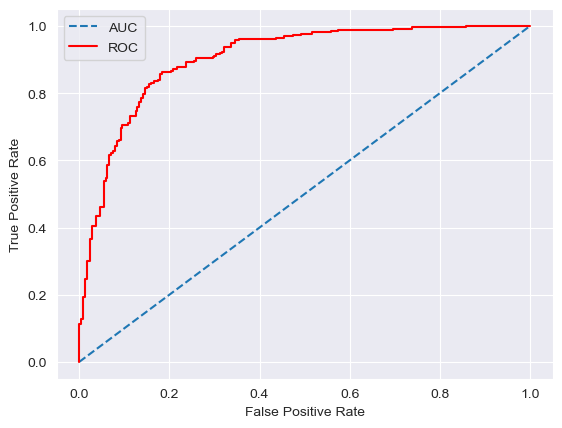

In [135]:

import matplotlib.pyplot as plt
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
 
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]

# fit a model
classifer = LogisticRegression(solver='lbfgs')
classifer.fit(trainX, trainy)

# predict probabilities
lr_probs = classifer.predict_proba(testX)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)



# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='AUC')
plt.plot(lr_fpr, lr_tpr,color='red',label='ROC')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

# show the plot
plt.show()